## Paso 4. Análisis exploratorio de datos (Python)

In [4]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Leer los archivos CSV
df_companies = pd.read_csv('moved_project_sql_result_01.csv')
df_locations = pd.read_csv('moved_project_sql_result_04.csv')
df = pd.read_csv('moved_project_sql_result_07.csv', parse_dates=['start_ts'])

In [6]:
# Vista previa de los primeros registros
print(df_companies.head())
print(df_locations.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [7]:
# Información general de los dataframes
print(df_companies.info())
print(df_locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [8]:
# Verificar tipos
print(df_companies.dtypes)
print(df_locations.dtypes)

company_name    object
trips_amount     int64
dtype: object
dropoff_location_name     object
average_trips            float64
dtype: object


In [9]:
# Asegurarse de que trips_amount y average_trips son numéricos
df_companies['trips_amount'] = pd.to_numeric(df_companies['trips_amount'], errors='coerce')
df_locations['average_trips'] = pd.to_numeric(df_locations['average_trips'], errors='coerce')

In [10]:
top10_locations = df_locations.sort_values(by='average_trips', ascending=False).head(10)
print(top10_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


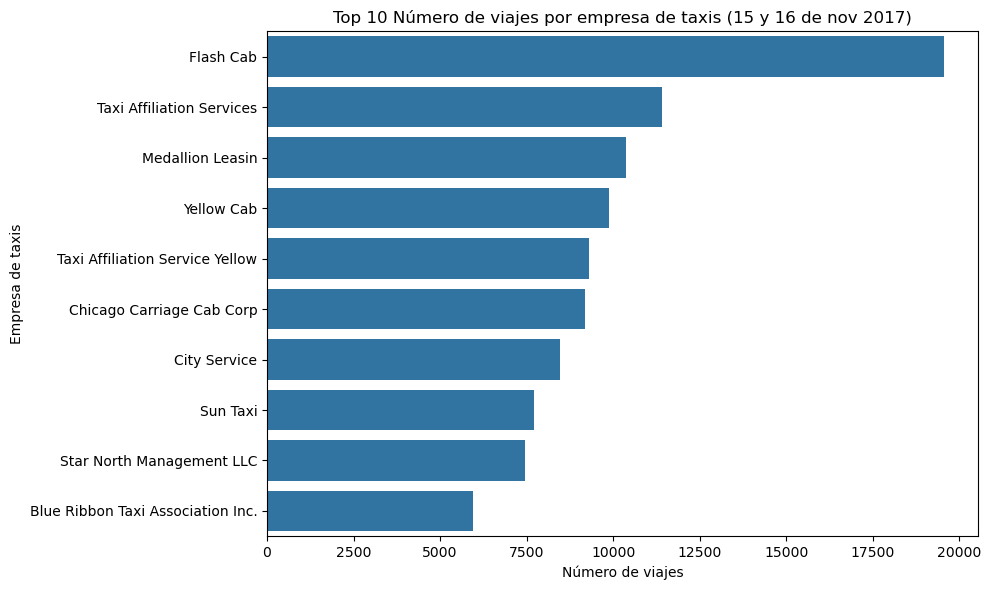

In [11]:
top_10_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_companies,
            x='trips_amount', y='company_name')
plt.title('Top 10 Número de viajes por empresa de taxis (15 y 16 de nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.tight_layout()
plt.show()

El gráfico muestra que empresas hicieron más viajes el 15 y 16 de noviembre. Los picos mas altos pueden deberse a una mejor cobertura, más flota disponible o contratos exclusivos.

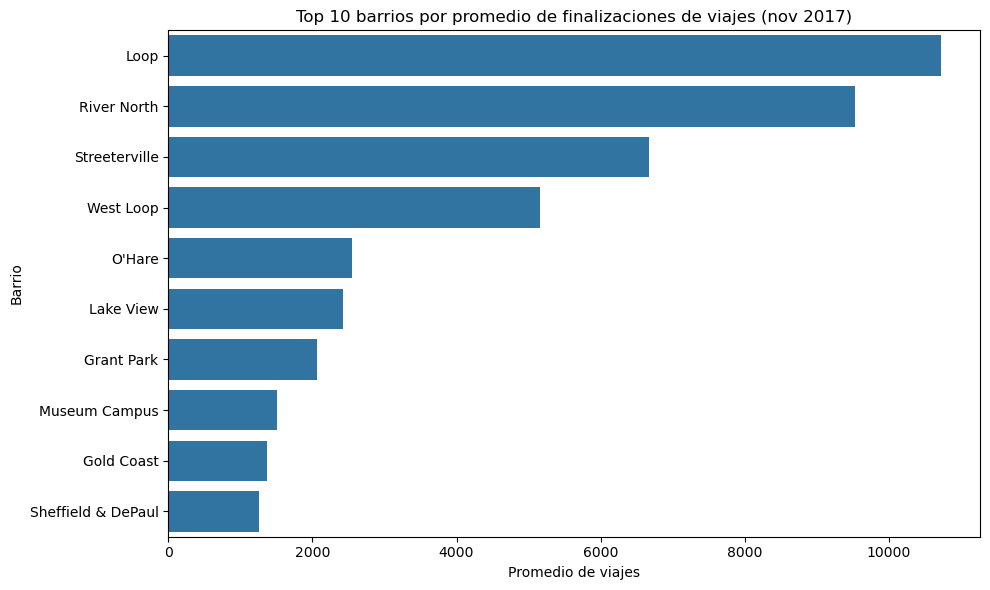

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_locations, x='average_trips', y='dropoff_location_name')
plt.title('Top 10 barrios por promedio de finalizaciones de viajes (nov 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

Podemos ver en qué zonas de la ciudad los taxis suelen dejar a los pasajeros.

Los datos pueden ser aprovechados para mejorar el servicio de transporte en la ciudad.

## Paso 5. Prueba de hipótesis (Python)

In [13]:
df['weekday'] = df['start_ts'].dt.day_name()

### Hipótesis nula (H₀):
La duración promedio de los viajes los sábados con lluvia es igual a la de los sábados sin lluvia.

### Hipótesis alternativa (H₁):
La duración promedio de los viajes los sábados con lluvia es diferente a la de los sábados sin lluvia.

In [14]:
saturdays = df[df['weekday'] == 'Saturday']

In [15]:
bad_weather = saturdays[saturdays['weather_conditions'] == 'Bad']
good_weather = saturdays[saturdays['weather_conditions'] == 'Good']

In [16]:
alpha = 0.05 
t_stat, p_value = stats.ttest_ind(
    bad_weather['duration_seconds'],
    good_weather['duration_seconds'],
    equal_var=False  
)

print(f"Estadístico t: {t_stat:.3f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: 7.186
Valor p: 0.0000


In [17]:
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la duración promedio cambia los sábados con mal clima.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en la duración.")

Rechazamos la hipótesis nula: la duración promedio cambia los sábados con mal clima.


La duración promedio de los viajes sí cambia en los sábados con mal clima, en comparación con los sábados con buen clima.

Las condiciones climáticas adversas pueden tener un impacto en el tiempo que tardan los viajes hacia el aeropuerto, probablemente debido al tráfico o visibilidad reducida.